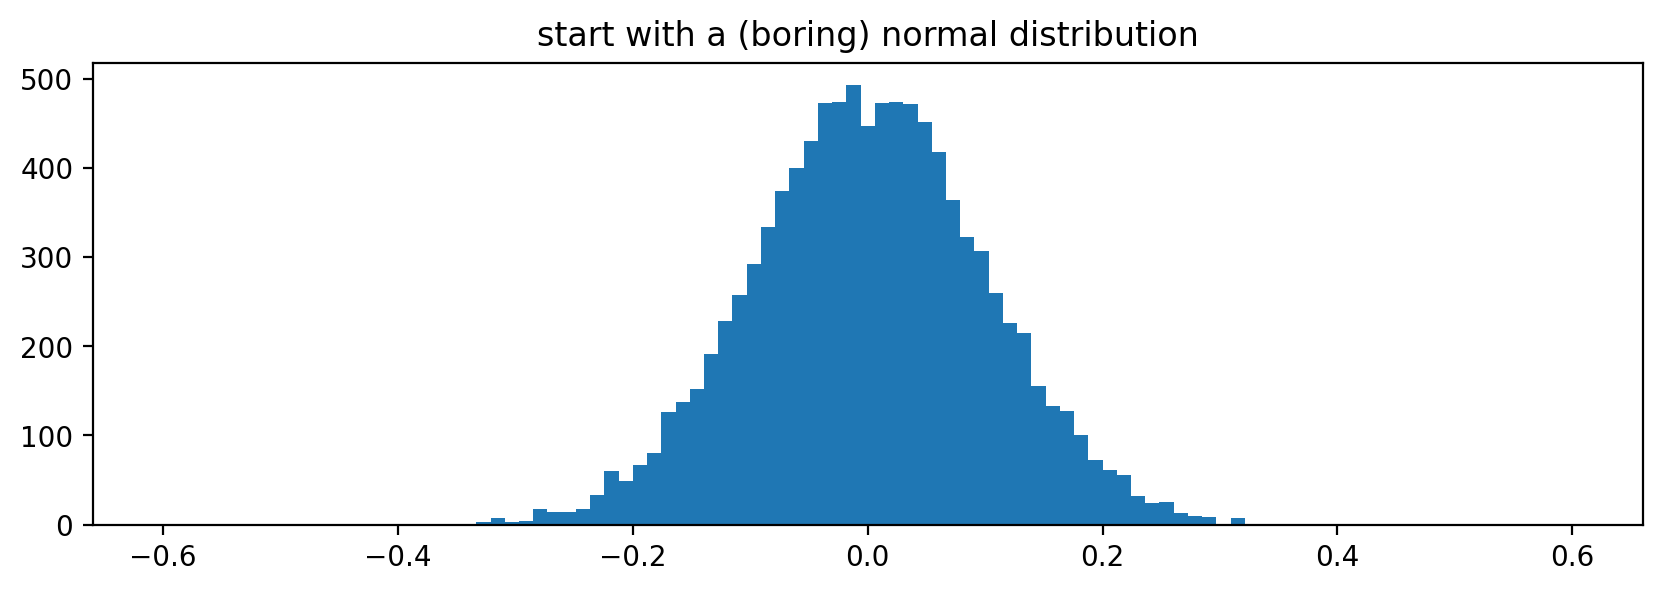

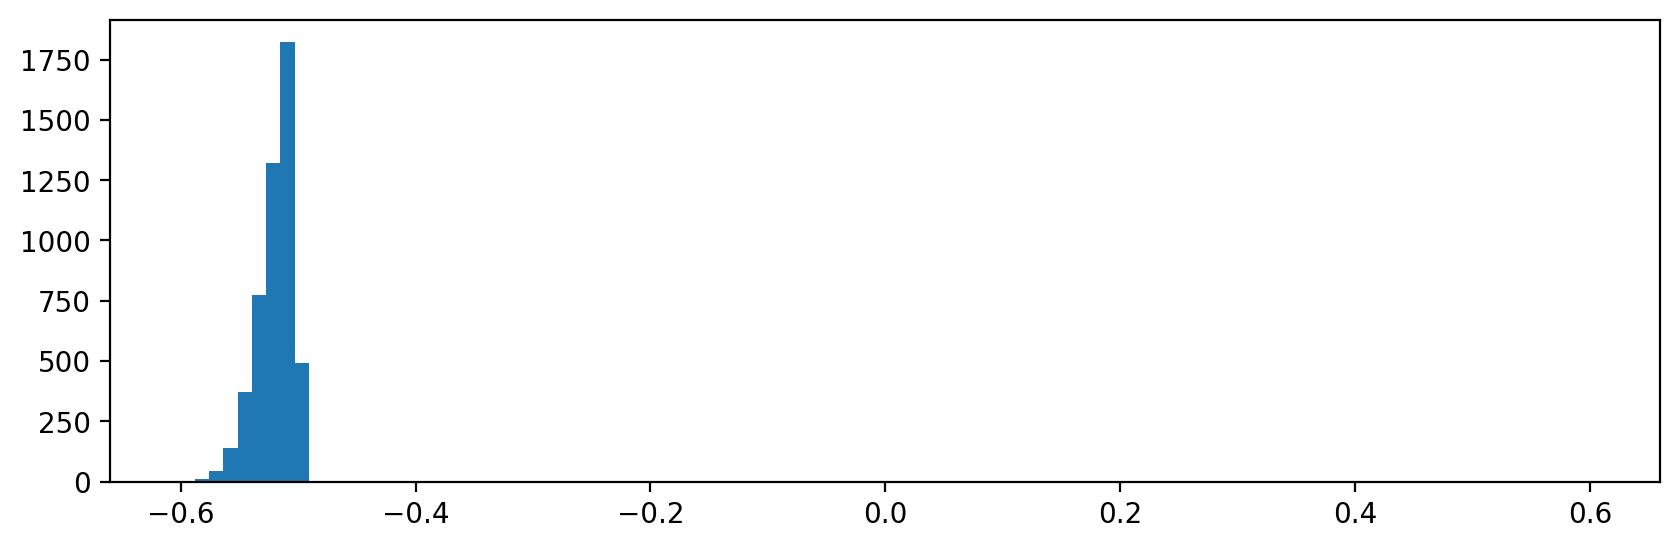

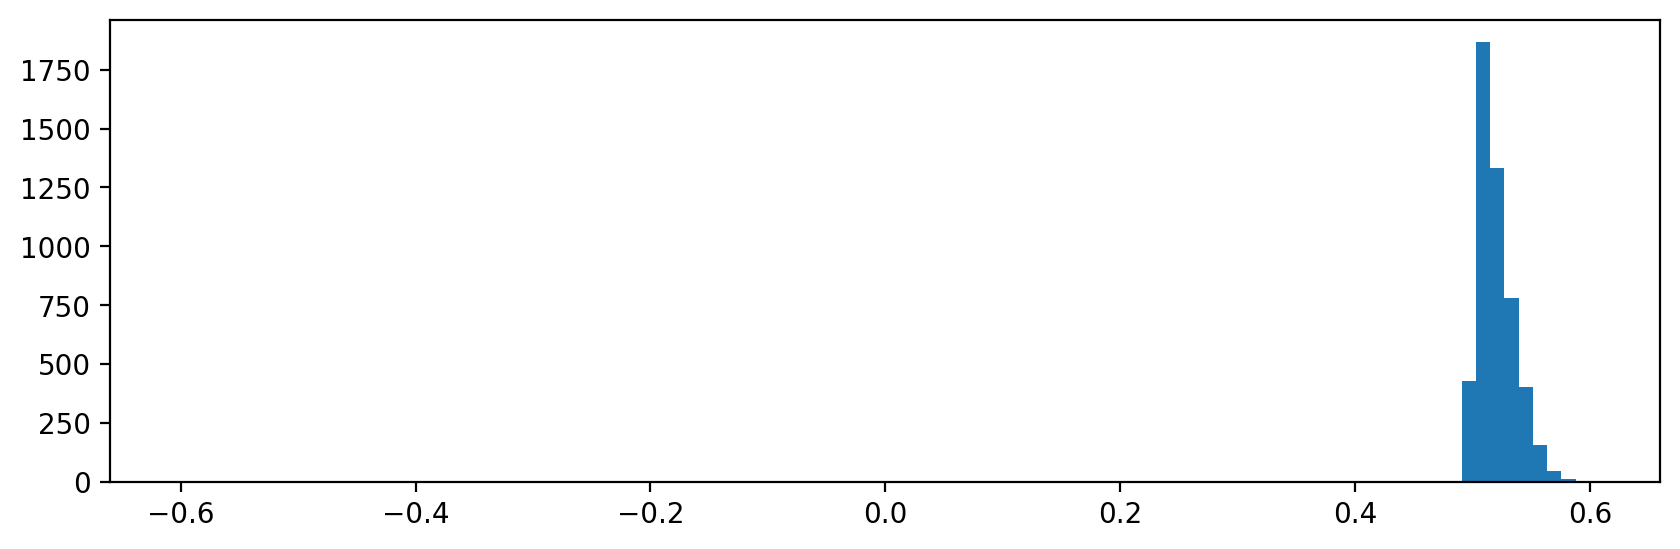

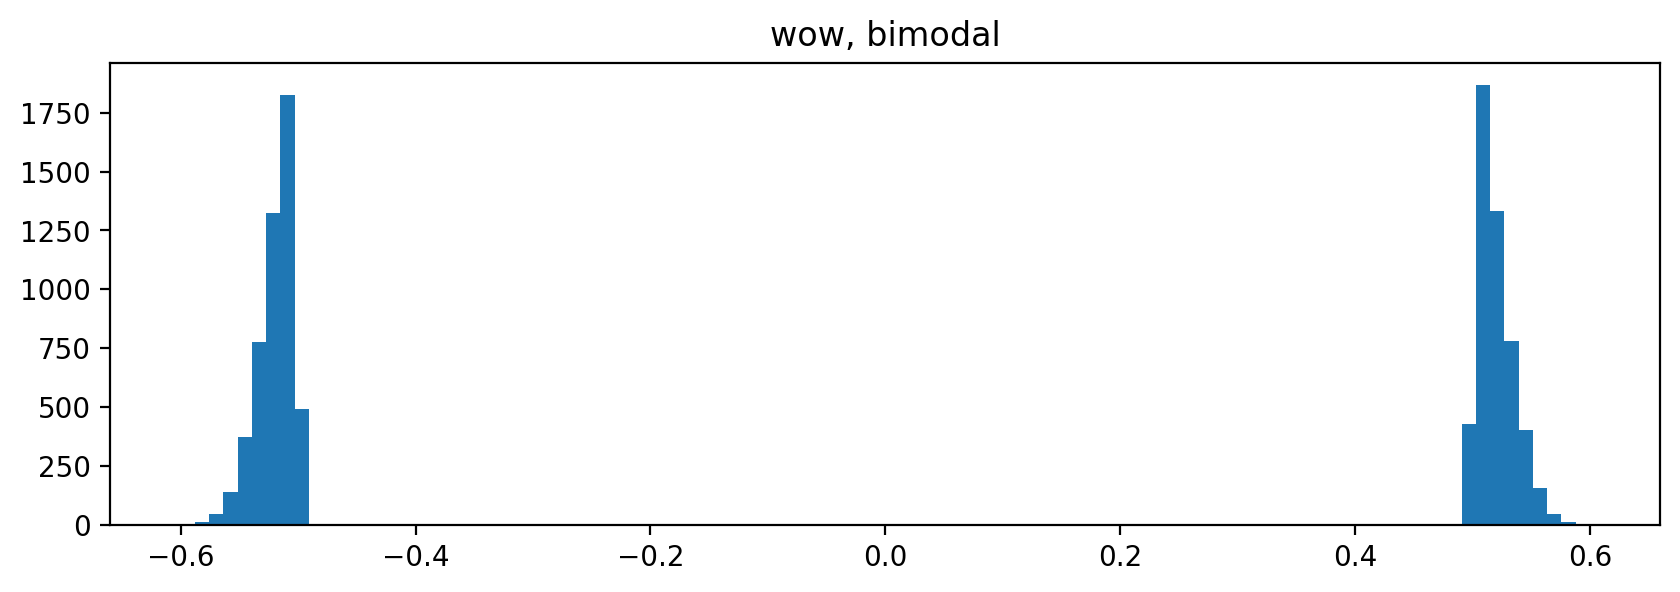

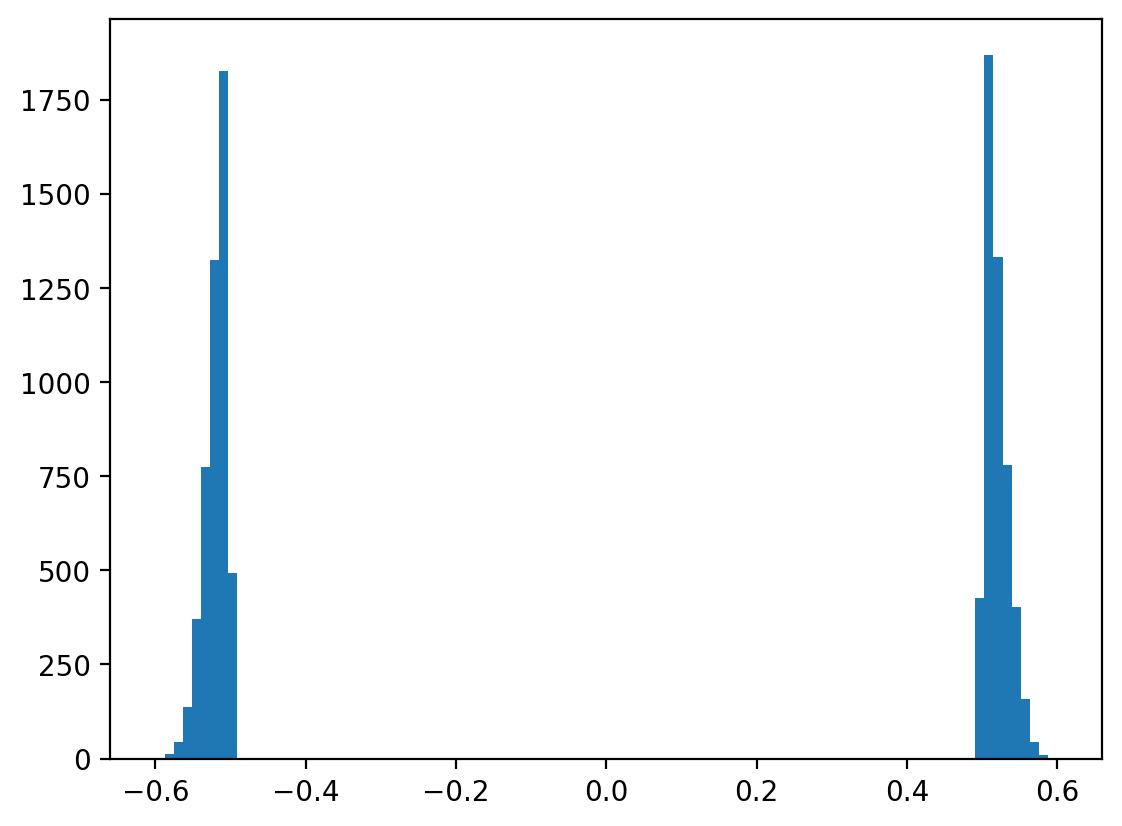

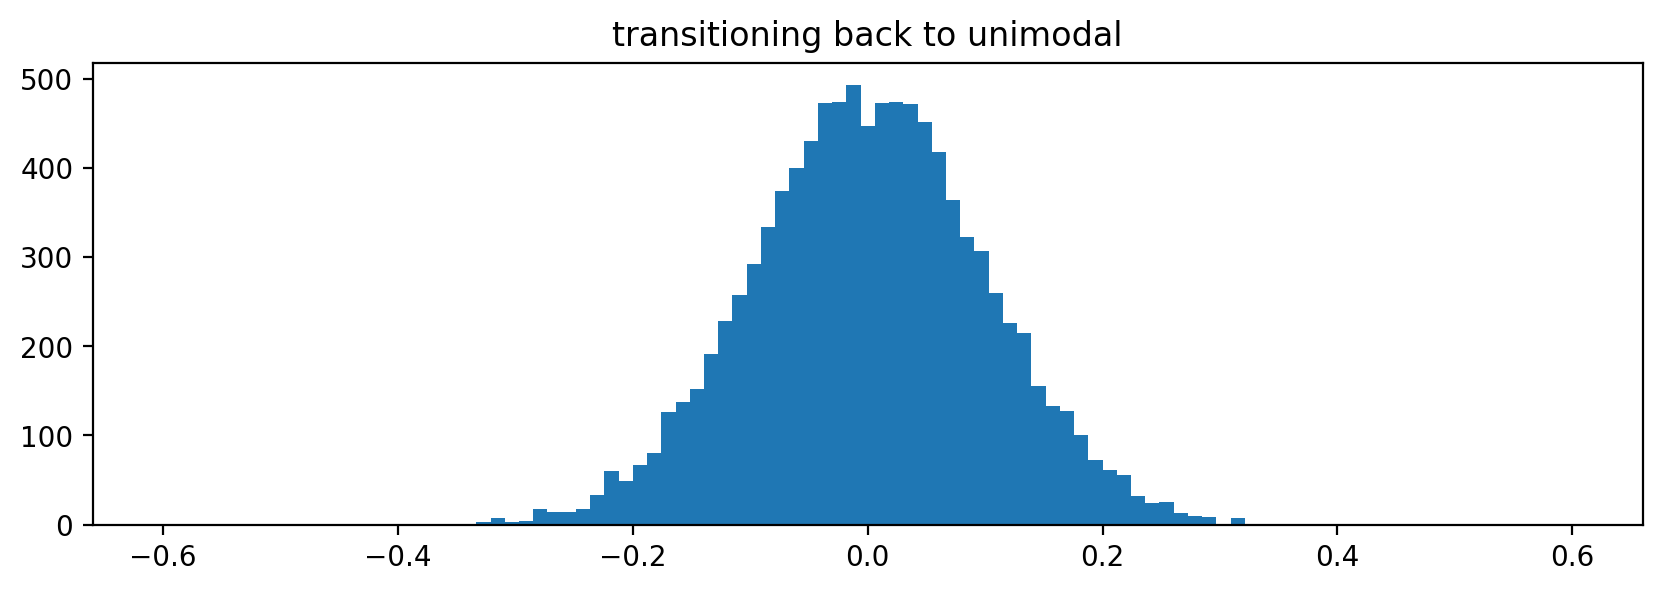

In [1]:
import numpy as np
from scipy.special import expit as sigmoid
from scipy.special import logit
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler


rng = np.random.default_rng(124)

bins = np.linspace(-0.6, 0.6, 100)

# Step 1: Generate data from a univariate Gaussian distribution
data = rng.normal(loc=0, scale=0.1, size=10000)

fig, ax = plt.subplots(figsize=(10, 3))
ax.set_title('start with a (boring) normal distribution')
ax.hist(data, bins=bins)

# Step 2: Apply the sigmoid function to the data
data_sigmoid0 = sigmoid(np.abs(data[data<0]))
data_sigmoid1 = sigmoid(data[data>0])
# 
# fig, ax = plt.subplots(figsize=(10, 3))
# ax.hist(-data_sigmoid0, bins=bins)
# 
# fig, ax = plt.subplots(figsize=(10, 3))
# ax.hist(data_sigmoid1, bins=bins)

# Step 3: Create a bimodal distribution by concatenating the sigmoid data with its negative
data_bimodal = np.concatenate([-data_sigmoid0, data_sigmoid1])

# Now, 'data_bimodal' should have a bimodal distribution
fig, ax = plt.subplots(figsize=(10, 3))
ax.set_title('wow, bimodal')
ax.hist(data_bimodal, bins=bins)

fig, ax = plt.subplots()
ax.hist(data_bimodal, bins=bins)

data_sigmoid0 = logit(np.abs(data_bimodal[data_bimodal<0]))
data_sigmoid1 = logit(data_bimodal[data_bimodal>0])

data = np.concatenate([-data_sigmoid0, data_sigmoid1])

fig, ax = plt.subplots(figsize=(10, 3))
ax.set_title("transitioning back to unimodal")
ax.hist(data, bins=bins);

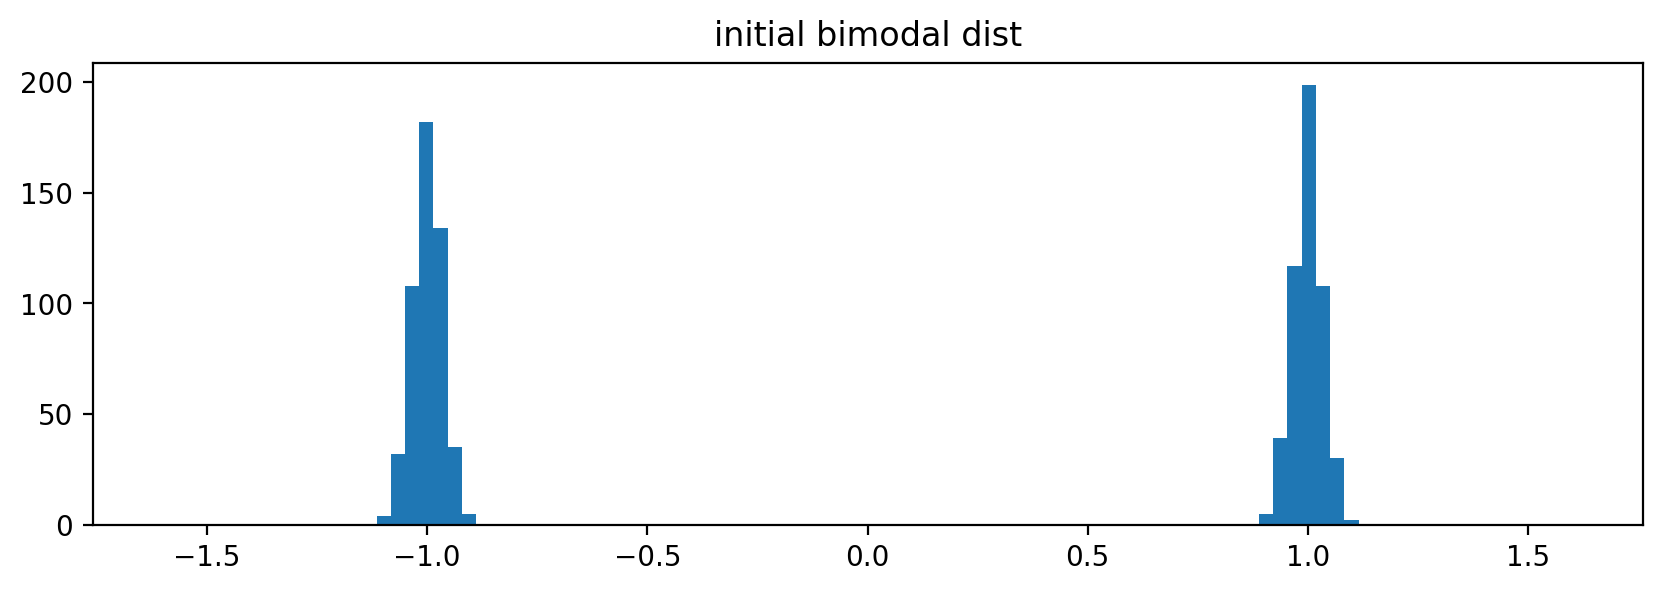

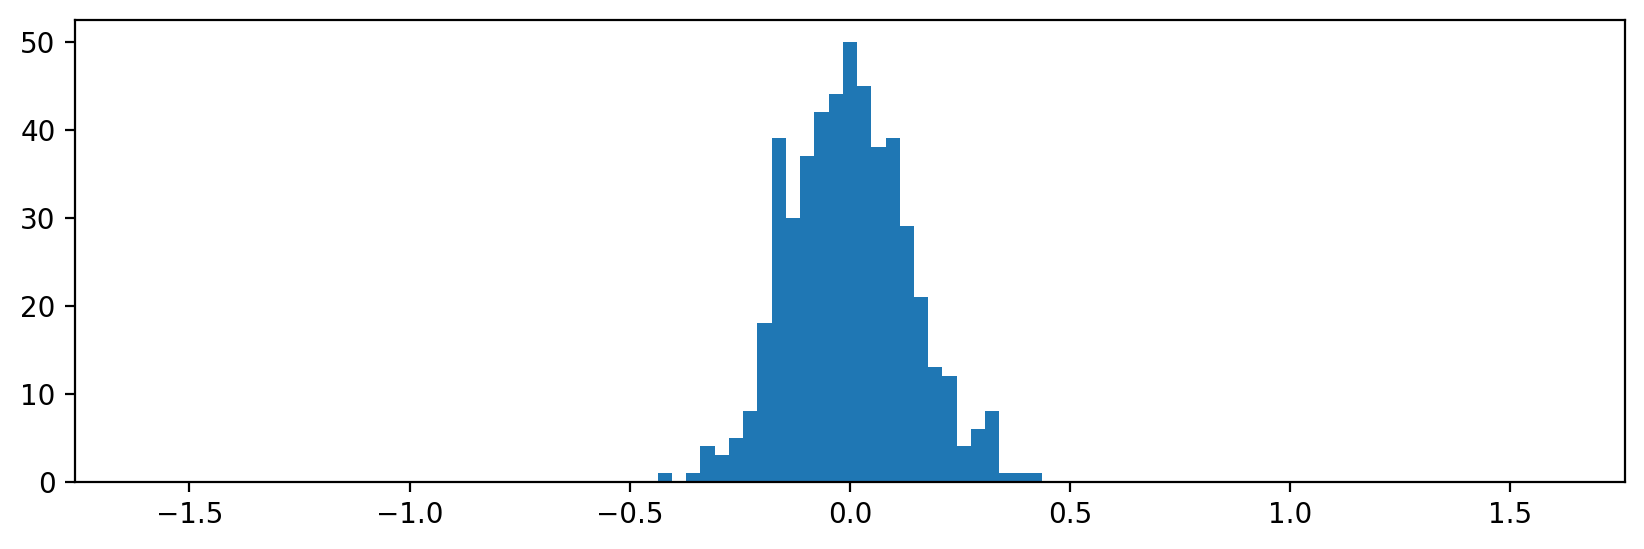

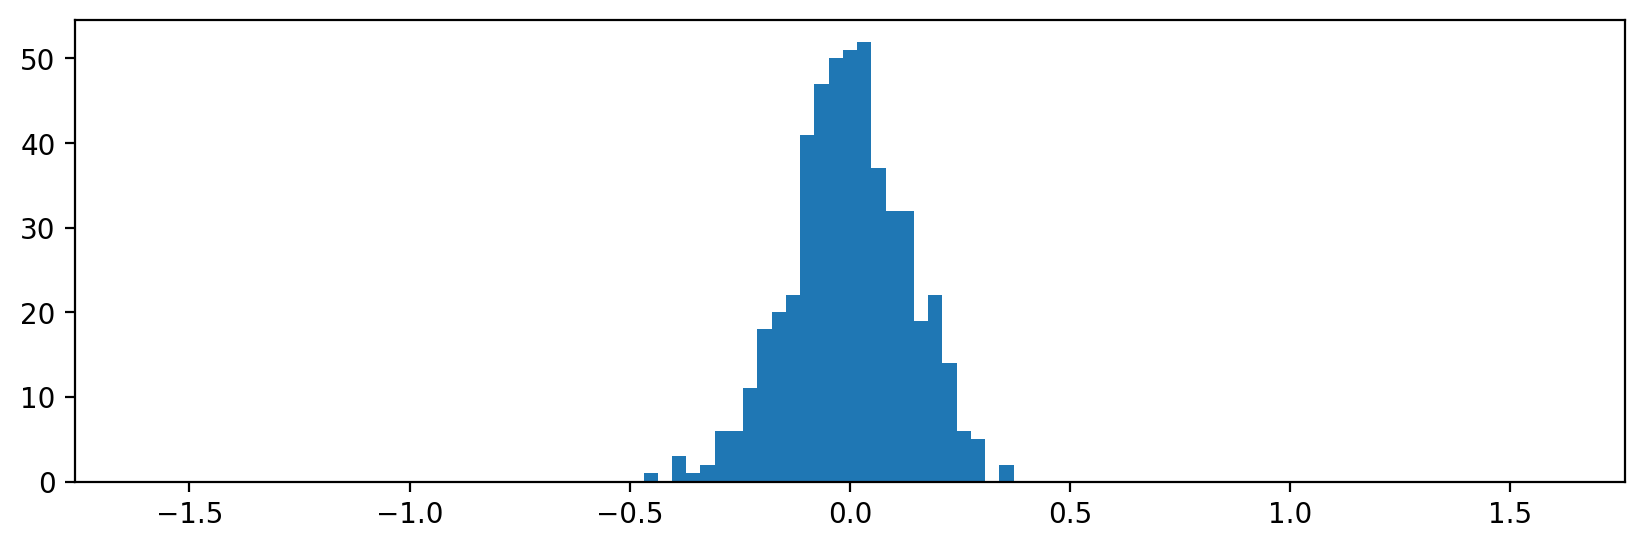

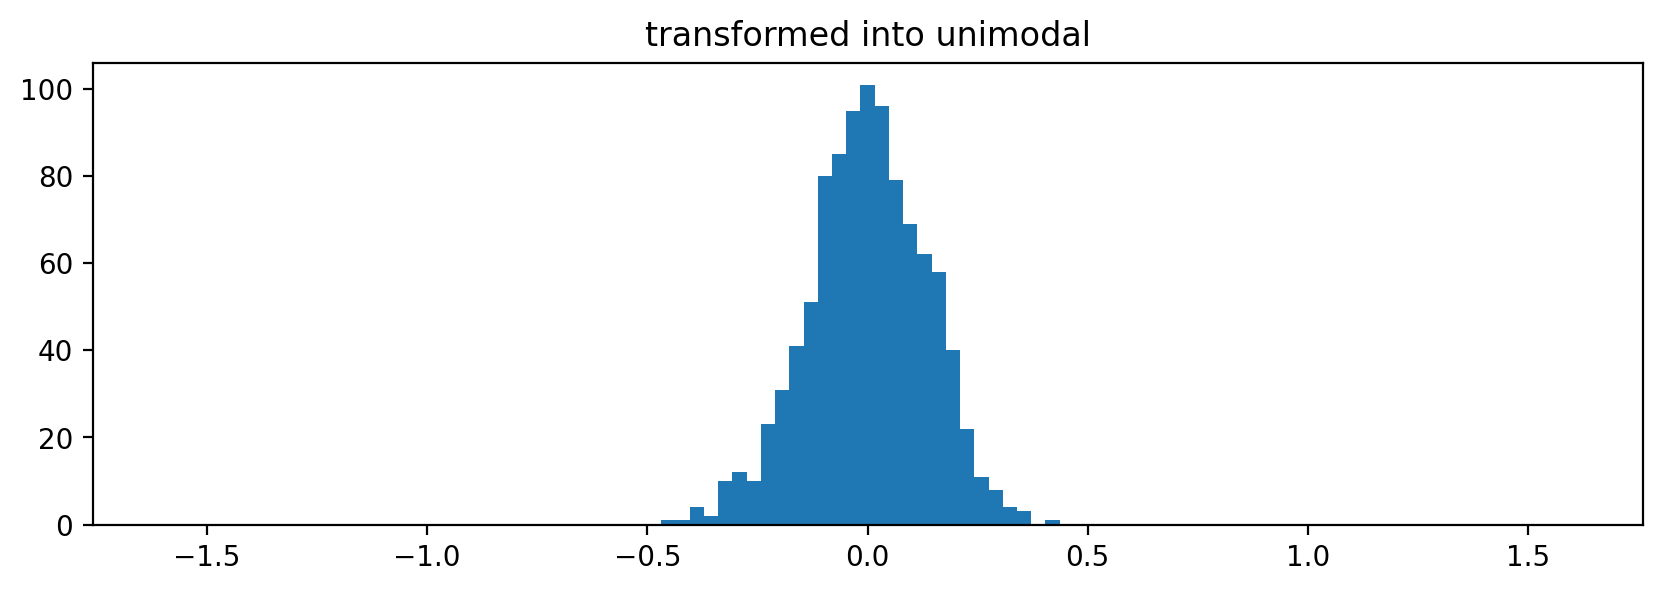

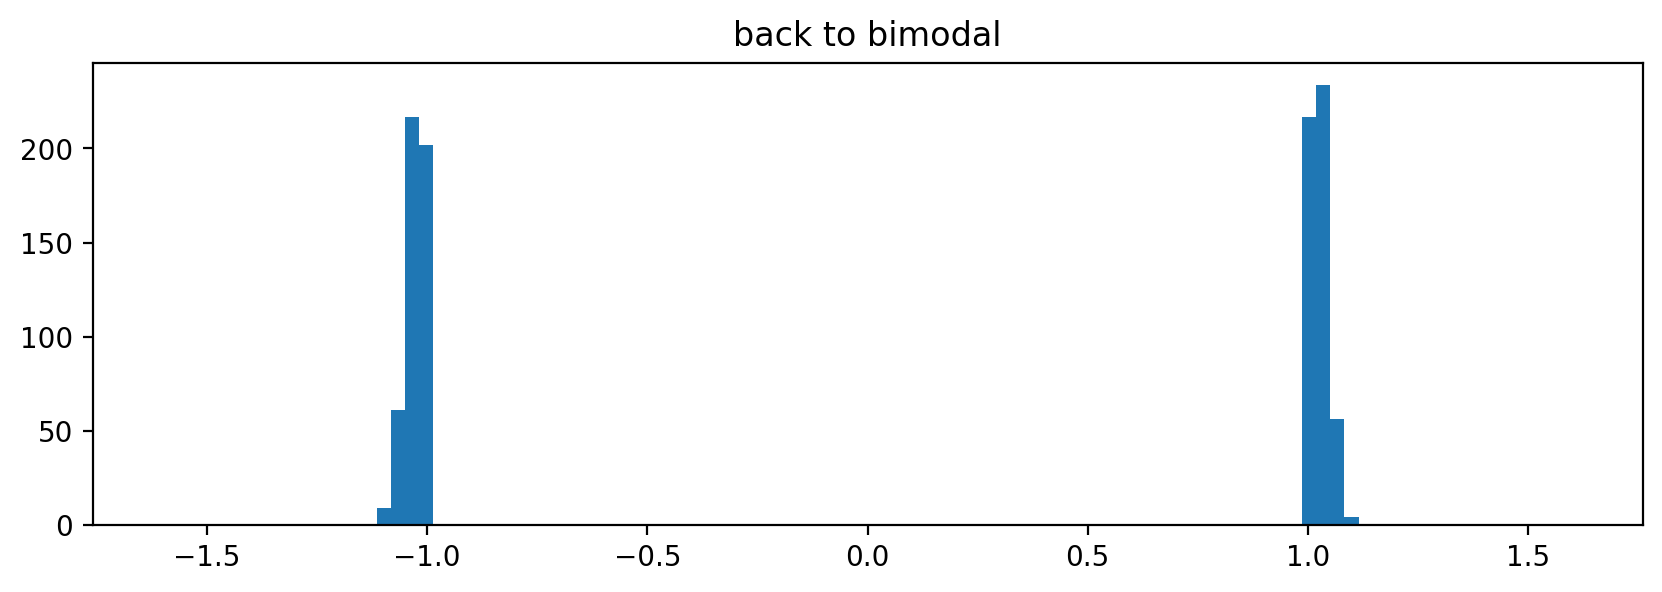

In [14]:
rng = np.random.default_rng(123)
bins = np.linspace(-1.6, 1.6, 100)

# Assume we have some bimodal data
data_bimodal = np.concatenate([
    rng.normal(loc=3, scale=0.1, size=500), 
    rng.normal(loc=-3, scale=0.1, size=500)])

# Create a scaler object
scaler = StandardScaler()
# Fit the scaler to the data and transform the data
data_bimodal = scaler.fit_transform(data_bimodal.reshape(-1, 1)).flatten()

fig, ax = plt.subplots(figsize=(10, 3))
ax.set_title("initial bimodal dist")
ax.hist(data_bimodal, bins=bins)
# 
# print(data_bimodal.shape)
# 
data_sigmoid0 = logit(np.abs(data_bimodal[data_bimodal<0])-0.5)
#print(np.abs(data_bimodal[data_bimodal<0]).mean())
data_sigmoid1 = logit(data_bimodal[data_bimodal>0]-0.5)

fig, ax = plt.subplots(figsize=(10, 3))
ax.hist(data_sigmoid0, bins=bins);
fig, ax = plt.subplots(figsize=(10, 3))
ax.hist(data_sigmoid1, bins=bins);



data = np.concatenate([-data_sigmoid0, data_sigmoid1])

fig, ax = plt.subplots(figsize=(10, 3))
ax.set_title("transformed into unimodal")
ax.hist(data, bins=bins)

# Step 2: Apply the sigmoid function to the data
data_sigmoid0 = sigmoid(np.abs(data[data<0]))+0.5
data_sigmoid1 = sigmoid(data[data>0])+0.5
# 
# Step 3: Create a bimodal distribution by concatenating the sigmoid data with its negative
data_bimodal = np.concatenate([-data_sigmoid0, data_sigmoid1])
# 
fig, ax = plt.subplots(figsize=(10, 3))
ax.set_title("back to bimodal")     &@


`)%i